In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#loading the data from csv file to a pandas dataframe
mail_data = pd.read_csv('mail_data.csv')

In [3]:
#printing the top rows of the data
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#shape of the data
mail_data.shape

(5572, 2)

In [5]:
#data description
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
#counting the null values in the data
mail_data.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
#checking for duplicate enteries in the data 
mail_data.duplicated().sum()

415

In [8]:
mail_data.shape

(5572, 2)

In [9]:
#remove duplicates
mail_data = mail_data.drop_duplicates(keep = 'first')

In [10]:
mail_data.shape

(5157, 2)

In [11]:
#Replacing the null values with a null string
mail_data = mail_data.where((pd.notnull(mail_data)), '')

In [12]:
#printing the first five rows of our data
print(mail_data[0:5])

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


**Label Encoding**

In [13]:
#label spam mail as 0
#label ham mail as 1

In [14]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [15]:
mail_data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


**EDA-exploratory data analysis**

In [16]:
#frequencies of the target classes
mail_data['Category'].value_counts()

1    4516
0     641
Name: Category, dtype: int64

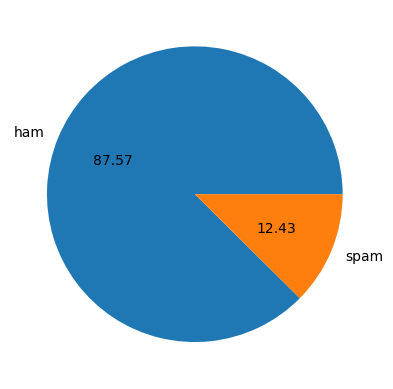

In [17]:
#pie chart visualization of the categorical distribution of data
plt.pie(mail_data['Category'].value_counts(), labels=['ham', 'spam'], autopct ='%0.2f' )
plt.show()

In [18]:
#data is imbalance: no of spam<--ham

**Use of NLTK - natural language tool-kit**

**Deeper analysis of the data**

In [19]:
#nltk helps to count the characters in the texts, it count no of words and no of sentences in a text
#it brings deeper analysis of text data
#import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\suraj
[nltk_data]     ahirwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#counting no of characters present in the text and adding a new column named no_characters
mail_data['no_characters'] = mail_data['Message'].apply(len)

In [21]:
#dividing the sentences into words 
mail_data['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [22]:
#counting no of words present in the text and adding a new column named no_words
mail_data['no_words'] = mail_data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
#counting no of sentence present in the text and adding a new column named no_sentences
mail_data['no_sentences'] = mail_data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
mail_data.head()

,Category,Message,no_characters,no_words,no_sentences
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2
1,1,Ok lar... Joking wif u oni...,29,8,2
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,1,U dun say so early hor... U c already then say...,49,13,1
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
#checking the description of the new added features(no_characters, no_words, no_sentences)
mail_data[['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.557882,1.950553
std,58.382922,13.406024,1.362981
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
#describe function on the spam messages for the new added features
mail_data[mail_data['Category']==0][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.967239
std,30.399707,7.103501,1.480241
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,8.000000


In [27]:
#describe function on the ham messages for the new added features
mail_data[mail_data['Category']==1][['no_characters', 'no_words', 'no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.264836,1.806244
std,56.708301,13.587852,1.281910
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


<AxesSubplot:xlabel='no_characters', ylabel='Count'>

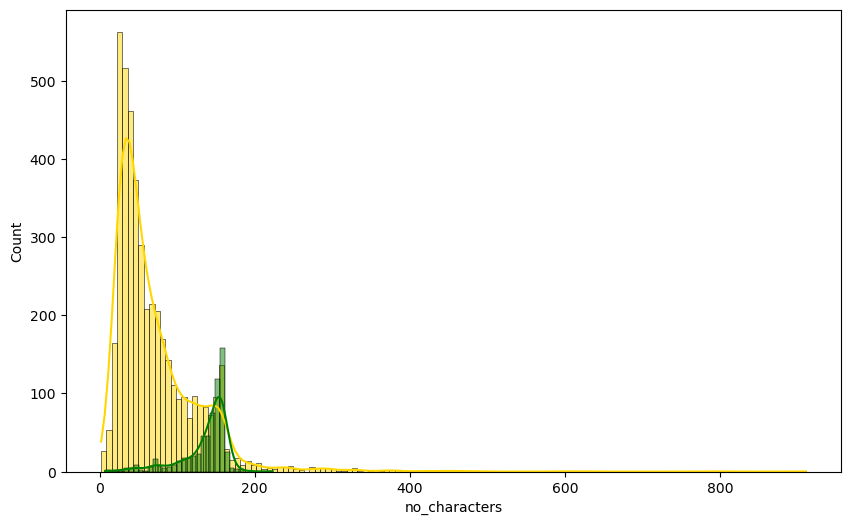

In [28]:
#plotting histogram to see the no of characters distribution based on the category of message
plt.figure(figsize=(10, 6))
sns.histplot(data = mail_data[mail_data['Category']==1]['no_characters'], kde = True, color ='gold')
sns.histplot(data = mail_data[mail_data['Category']==0]['no_characters'], kde = True, color = 'g')
#sns.histplot(x = "no of characters")

<AxesSubplot:xlabel='no_words', ylabel='Count'>

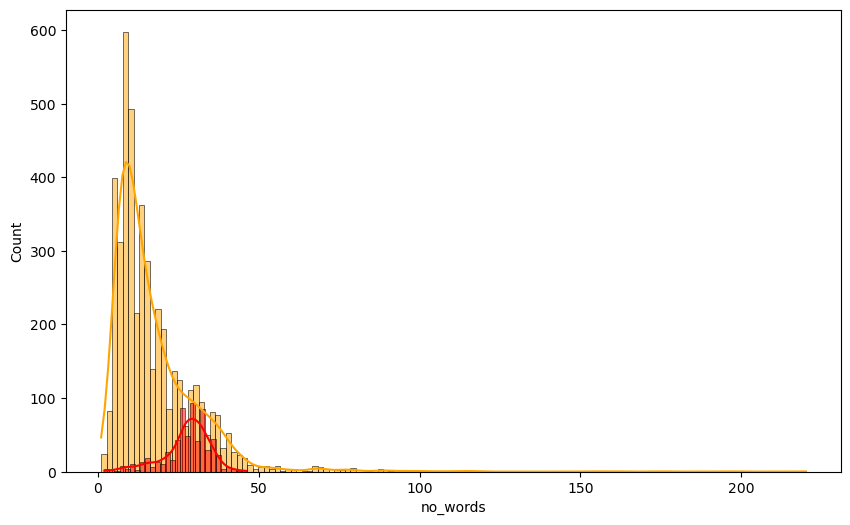

In [29]:
#plotting histogram to see the no of words distribution based on the category of message
plt.figure(figsize=(10, 6))
sns.histplot(data = mail_data[mail_data['Category']==1]['no_words'], kde = True, color ='orange')
sns.histplot(data = mail_data[mail_data['Category']==0]['no_words'], kde = True, color = 'red')
#sns.histplot(x = "no of characters")

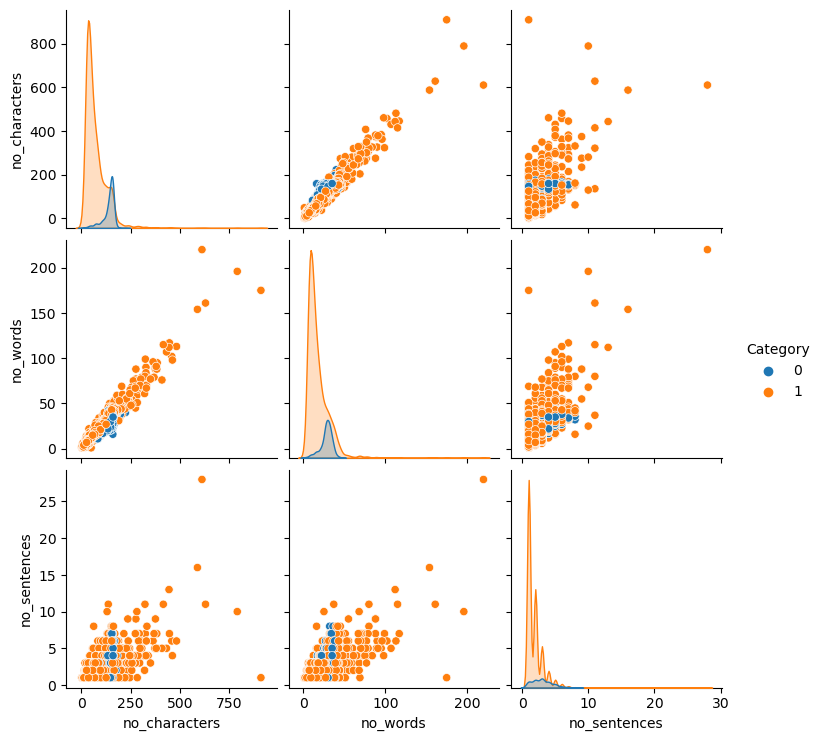

In [30]:
#pair plot helps to detect the outliers present in the data 
sns.pairplot(mail_data, hue='Category')

<AxesSubplot:>

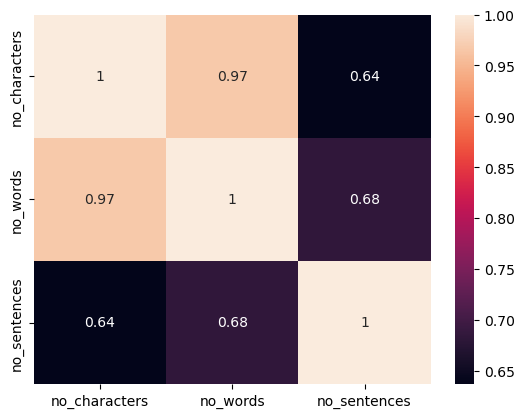

In [31]:
sns.heatmap(mail_data.corr(), annot =True)

**DATA PREPROCESSING**
* Lower cases
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* stemming

In [32]:
#for stopwords
#import nltk
nltk.download()

#stop words
#from nltk.corpus import stopwords
#stopwords.words('english')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [33]:
#for punctuation
#import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
#for stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [35]:
#function to perform above operations of data pre-procesing
def transform_text(text):
    #Lower cases
    text = text.lower()
    #tokenization
    text = nltk.word_tokenize(text)
    
    y = []
    #removing pecial characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y.copy()
    y.clear()
    
    #removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
            
    text = y.copy()
#    txt_before_stemming = y.copy()
    y.clear()
    for i in text :
        y.append(ps.stem(i))
    return " ".join(y)

In [36]:
transform_text('Hi hoW Are yOu suraj you are the manager of the nss? %%')

'hi suraj manag nss'

In [37]:
mail_data['transformed_text'] = mail_data['Message'].apply(transform_text)

In [38]:
mail_data.head()

,Category,Message,no_characters,no_words,no_sentences,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
#printing word_cloud that shows the hight frequent words in the data 
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [40]:
spam_wc = wc.generate(mail_data[mail_data['Category'] == 1]['transformed_text'].str.cat(sep = ""))

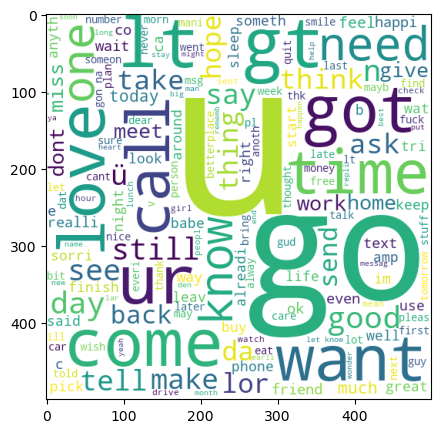

In [41]:
plt.figure(figsize=(14, 5))
plt.imshow(spam_wc)

In [42]:
#mail_data[mail_data['Category']==1]['transformed_text'].tolist()

In [43]:
spam_corpus = []
for msg in mail_data[mail_data['Category']==1]['transformed_text'].tolist() :
    for word in msg.split():
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

35930

([<matplotlib.axis.XTick at 0x1f77542f580>,
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, '2'),
  Text(4, 0, 'gt'),
  Text(5, 0, 'lt'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'love'),
  Text(12, 0, 'time'),
  Text(13, 0, 'ok'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'ü'),
  Text(19, 0, 'need'),
  Text(20, 0, 'one'),
  Text(21, 0, '4'),
  Text(22, 0, 'lor'),
  Text(23, 0, 'home'),
  Text(24, 0, 'think'),
  Text(25, 0, 'see'),
  Text(26, 0, 'take'),
  Text(27, 0, 'still'),
  Text(28, 0, 'da'),
  Text(29, 0, 'tell')])

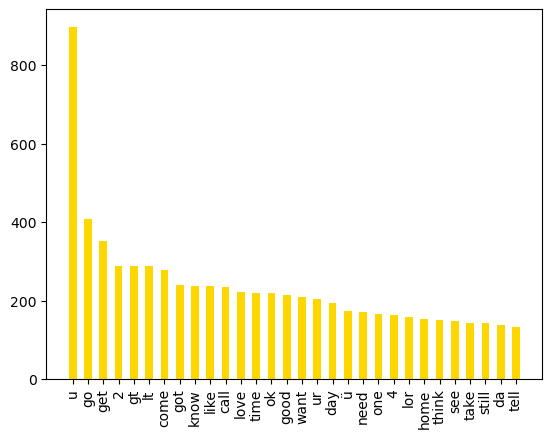

In [45]:
from collections import Counter
df  = pd.DataFrame(Counter(spam_corpus).most_common(30))
plt.bar(df[:][0], df[:][1], color = 'gold', width = 0.5)
y_pos = range(30)
plt.xticks(y_pos, df[:][0], rotation=90)

In [46]:
ham_corpus = []
for msg in mail_data[mail_data['Category']==0]['transformed_text'].tolist() :
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

9781

([<matplotlib.axis.XTick at 0x1f7751bf5e0>,
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'ur'),
  Text(6, 0, 'u'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'tone'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'award'),
  Text(20, 0, 'nokia'),
  Text(21, 0, 'contact'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'min'),
  Text(28, 0, 'c'),
  Text(29, 0, 'guarante')])

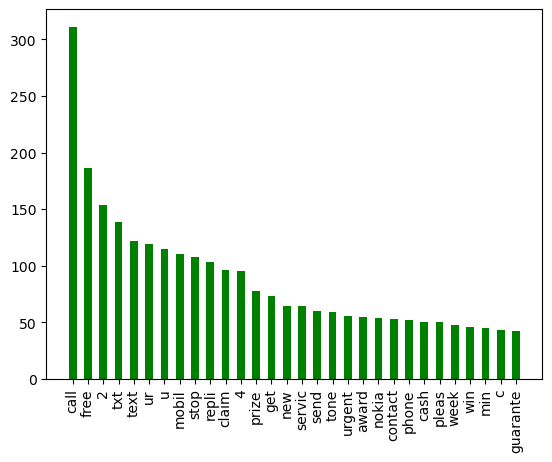

In [48]:
from collections import Counter
df  = pd.DataFrame(Counter(ham_corpus).most_common(30))
plt.bar(df[:][0], df[:][1], color = 'green', width = 0.5)
y_pos = range(30)
plt.xticks(y_pos, df[:][0], rotation=90)

In [49]:
mail_data.head()

,Category,Message,no_characters,no_words,no_sentences,transformed_text
0,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# MODEL BUILDING

In [50]:
#vectorizers for feature selection --always used in the case of a text-data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer(max_features = 3000)
tfidf = TfidfVectorizer(max_features = 3000)

In [51]:
#X = tfidf.fit_transform(mail_data['transformed_text']).toarray()
X = cv.fit_transform(mail_data['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

In [52]:
#tried to get the better precision and acceptable accuracy using different combinations of X by including or excluding the,
#different features no_characters, no_words, no_sentences
#got the best result by including all three
X = np.hstack((X, mail_data['no_characters'].values.reshape(-1, 1)))
X = np.hstack((X, mail_data['no_words'].values.reshape(-1, 1)))
X = np.hstack((X, mail_data['no_sentences'].values.reshape(-1, 1)))

In [53]:
y = mail_data['Category'].values #values are in the object format
y = y.astype('int')  #converted into int format
y

array([1, 1, 0, ..., 1, 1, 1])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(4125, 3003)

In [56]:
X_test.shape

(1032, 3003)

In [57]:
#three types of naive-bayes models 
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
#gaussian naive bayes performance on the data
#gnb.fit(X_train, y_train)
#y_pred1 = gnb.predict(X_test)
#print(accuracy_score(y_test, y_pred1))
#print(confusion_matrix(y_test, y_pred1))
#print(precision_score(y_test, y_pred1))

In [59]:
#binomial naive bayes performance on the data
#bnb.fit(X_train, y_train)
#y_pred3 = bnb.predict(X_test)
#print(accuracy_score(y_test, y_pred3))
#print(confusion_matrix(y_test, y_pred3))
#print(precision_score(y_test, y_pred3))

In [60]:
#multinomial naive bayes performance on the data
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9825581395348837
[[129   7]
 [ 11 885]]
0.992152466367713


After trying the above three models(GaussianNB, MultinomialNB, BernoulliNB)
using the both feature_extraction vectorizers(Tfidfvectorizer and countvectorizer),
I was able to get the best results with the combination of "Countvectorizer and MultinomialNB" 
so i will chosse these two and all others will be marked as comment!


In [61]:
#countvectorizer---->MNB

**COMPARISION OF DIFFERENT CLASSIFICATION MODELS WITH EACH OTHER INCLUDING MULTINOMIAL ONE**

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:
#Logistic regression classifier
#penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. 
#Other options are 'l1', 'elasticnet', and 'none'.
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')

#Support vector machine classifier
#kernel trick is used for non-linear data, gamma values helps to define the boundary-size
#models with very large gamma values tend to overfit
#mostly the gamma ranges between 0.0001 to 10
svc = SVC(kernel='sigmoid', gamma=1.0)

#K-nearest neighbors classifier
knc = KNeighborsClassifier()

#Multinomial naive bayes classifier
mnb = MultinomialNB()

#decision tree classifier
dtc = DecisionTreeClassifier(max_depth=5)

#random forest classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

#adaboost classifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

#bagging classifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

#extra trees classifier -  similiar to random forest classification
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

#gradient boosting classifier
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

#xgb classifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [64]:
clfs = {
    lrc  : 'logistic regression',
    svc  : 'support vector machine',
    knc  : 'k-nearest neighbors',
    mnb  : 'multinomial naive-bayes',
    dtc  : 'decision tree',
    rfc  : 'random forest',
    abc  : 'adaboost',
    bc   : 'bagging',
    etc  : 'extra-tree',
    gbdt : 'gradient boosting',
    xgb  : 'XGB-classifier'
}

In [65]:
def fit__models(clf, X_train, X_test, y_train, y_test):
    acc_pre = []
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prs = precision_score(y_test, y_pred)
    acc_pre += [acc]
    acc_pre += [prs]
    return acc_pre

In [66]:
accuracy  = []
precision = []
for clf, name  in clfs.items():
    acc_prec = fit__models(clf, X_train, X_test, y_train, y_test)
    accuracy += [acc_prec[0]]
    precision += [acc_prec[1]]
    print("Model", name)
    print("The accuracy is : {}".format(acc_prec[0]))
    print("The precision is : {}".format(acc_prec[1]))

Model logistic regression
The accuracy is : 0.9786821705426356
The precision is : 0.9844789356984479
Model support vector machine
The accuracy is : 0.8682170542635659
The precision is : 0.8682170542635659
Model k-nearest neighbors
The accuracy is : 0.9418604651162791
The precision is : 0.9593406593406594
Model multinomial naive-bayes
The accuracy is : 0.9825581395348837
The precision is : 0.992152466367713
Model decision tree
The accuracy is : 0.9467054263565892
The precision is : 0.9497326203208556
Model random forest
The accuracy is : 0.9748062015503876
The precision is : 0.9748908296943232
Model adaboost
The accuracy is : 0.9699612403100775
The precision is : 0.9768467475192943
Model bagging
The accuracy is : 0.9699612403100775
The precision is : 0.9789590254706534
Model extra-tree
The accuracy is : 0.9806201550387597
The precision is : 0.9823788546255506
Model gradient boosting
The accuracy is : 0.9622093023255814
The precision is : 0.9642470205850487
Model XGB-classifier
The accur

In [67]:
acc_pre_df = pd.DataFrame({'Algorithm' : clfs.values(), 'Accuracy' : accuracy, 'Precision' : precision})

In [68]:
acc_pre_df.sort_values('Precision',ascending = False)

,Algorithm,Accuracy,Precision
3,multinomial naive-bayes,0.982558,0.992152
0,logistic regression,0.978682,0.984479
8,extra-tree,0.980620,0.982379
10,XGB-classifier,0.974806,0.979075
7,bagging,0.969961,0.978959
6,adaboost,0.969961,0.976847
5,random forest,0.974806,0.974891
9,gradient boosting,0.962209,0.964247
2,k-nearest neighbors,0.941860,0.959341
4,decision tree,0.946705,0.949733


In [69]:
#made comparisions using the tfidf and countvectorizer parameter of max_features set to 300 and setting it to zero
#decided to go with the Multinomial model : gave the highest precision and accuracy was also good

In [70]:
labels = np.array(acc_pre_df['Algorithm'])

In [71]:
acc_bars = np.array(acc_pre_df['Accuracy'])

In [72]:
prec_bars = np.array(acc_pre_df['Precision'])

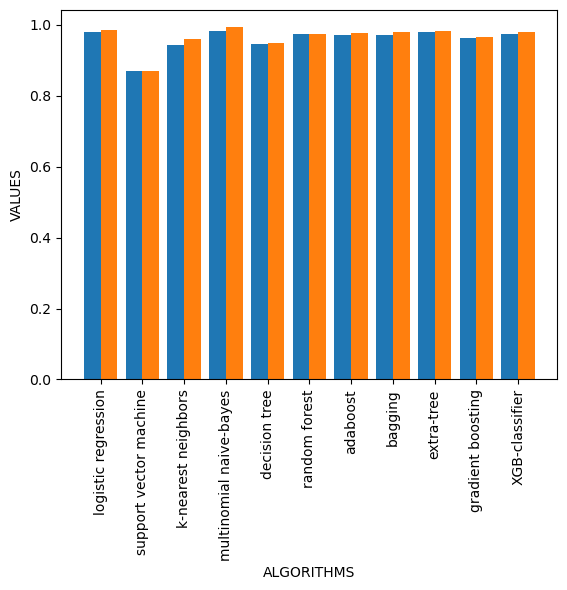

<function matplotlib.pyplot.legend(*args, **kwargs)>

In [73]:
X_axis = np.arange(len(labels))
plt.bar(X_axis - 0.2, acc_bars, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, prec_bars, 0.4, label = 'Precision')
plt.xticks(X_axis, labels, rotation=90)
plt.xlabel("ALGORITHMS")
plt.ylabel("VALUES")
plt.show()
plt.legend

In [74]:
#VOTING CLASSIFIER to enhance accuracy
#svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
#mnb = MultinomialNB()
#lrc = LogisticRegression()
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

#from sklearn.ensemble import VotingClassifier
#voting = VotingClassifier(estimators = [('lrc', lrc), ('nb', mnb), ('et', etc)], voting='soft')

In [75]:
#**Accuracy was imporived a little**

#**Precision was decreased**

#voting.fit(X_train, y_train)
#y_pred1 = voting.predict(X_test)
#print(precision_score(y_test, y_pred1))
#print(accuracy_score(y_test, y_pred1))

In [76]:
#Applying stacking
#estimators = [('lrc', lrc), ('nb', mnb), ('et', etc)]
#final_estimator = RandomForestClassifier()

In [77]:
#from sklearn.ensemble import StackingClassifier
#clf11 = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [78]:
#**Accuracy was imporived a little**

#**Precision was decreased**

#clf11.fit(X_train, y_train)
#y_pred11 = clf11.predict(X_test)
#print(precision_score(y_test, y_pred11))
#print(accuracy_score(y_test, y_pred11))

In [79]:
##I mainly focused over the precision 
#this model was the best to provide higher precision
#multinomial naive bayes performance on the data
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("Accuracy is : ",accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Precision is : ",precision_score(y_test, y_pred))

Accuracy is :  0.9825581395348837
[[129   7]
 [ 11 885]]
Precision is :  0.992152466367713


In [80]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))